# Reconnaissance faciale 

Dans ce projet, un modèle de reconnaissance faciale a été développé en utilisant TensorFlow et des techniques avancées de deep learning. L’objectif principal est de concevoir un réseau de neurones convolutifs capable de détecter et d'identifier des visages humains à partir d'images, avec une précision optimale, même en présence de variations d'éclairage, de poses ou d'expressions faciales.

Pour ce projet, nous avons créé notre propre jeu de données composé d'images de visages, à l'aide des bibliothèques OpenCV et Albumentations. Nous avons ensuite conçu un modèle de réseau de neurones convolutifs (CNN) en nous basant sur l'architecture VGG16, que nous avons adaptée à notre cas spécifique de reconnaissance faciale. Cette adaptation inclut des modifications au niveau des couches finales afin de mieux correspondre à la tâche de classification des visages.

Enfin, une fois le modèle défini, nous avons procédé à son entraînement, puis à son évaluation sur un ensemble de test afin de mesurer ses performances.

# Tâches à accomplir 

Dans ce projet de reconnaissance faciale, il y a deux types de tâches à accomplir :

**Classification (Présence ou absence d'un visage)**

Dans cette tâche, le modèle doit déterminer si un visage est présent dans l'image ou non. Ce type de problème est appelé classification binaire, car le modèle doit attribuer l'image à l'une des deux classes suivantes :

- Présence d'un visage : l'image contient un ou plusieurs visages.
- Absence de visage : aucun visage n'est détecté dans l'image.

Ici, le modèle génère une probabilité indiquant dans quelle mesure l’image appartient à l’une des deux classes. Par exemple, s’il renvoie une probabilité de 0,85, cela signifie qu’il est relativement sûr que l’image contient un visage.

**Régression (Localisation du visage avec une Bounding Box)**

Une fois que le modèle a détecté la présence d’un visage dans l’image, il doit également localiser précisément où il se trouve. Pour ce faire, le modèle utilise un processus de régression, où il prédit les coordonnées de la bounding box (ou boîte de délimitation) entourant le visage.

Une bounding box est un rectangle qui encadre le visage dans l’image. Elle est généralement définie par :

- x_min et y_min : les coordonnées du coin supérieur gauche du rectangle.
- x_max et y_max : les coordonnées du coin inférieur droit du rectangle.

Le modèle prédit ces valeurs pour chaque visage détecté, ce qui permet de le localiser précisément dans l’image.

**Deux tâches au sein d’un même réseau**

La variable à expliquer y contiendra deux éléments : la classe (visage ou non) ainsi que les coordonnées de la bounding box.

Ainsi, nous pouvons considérer qu’il y a deux modèles intégrés dans le même réseau :

- Un modèle chargé de la classification (présence ou absence de visage).
- Un modèle chargé de la régression (prédiction des coordonnées de la bounding box).

# Création des images 

In [1]:
# !pip install labelme tensorflow opencv-python albumentations 

In [10]:
import os 
import uuid 
import time

In [14]:
Images_chemin = os.path.join('data', 'images') # pour creér un dossier/chemin dans nos fichiers ('dir', 'file')
number_images = 30

In [17]:
cap = cv2.VideoCapture(0)
for img_num in range(number_images):
    print(f'Image numéro {img_num}')
    ret, fenêtre = cap.read() # ret indique si la capture a réussi (True/False), frame contient l'image capturée
    imgname = os.path.join(Images_chemin, f'{str(uuid.uuid1())}.jpg') # créer un chemin et un dossier, avec comme nom un ID unique + .jpg, il y a 
                                                                    # plusieurs types de uuid (uuid1, uuid2,...) 
    cv2.imwrite(imgname, fenêtre) # enregistre l’image capturée sous forme de fichier .jpg.
    cv2.imshow('fenêtre', fenêtre) # affiche l’image capturée dans une fenêtre nommée "frame".
    time.sleep(0.5)
    
    if cv2.waitKey(1) & 0xFF == ord('q'): # vérifie si l’utilisateur appuie sur "q". si oui, arrête la capture d’images.
        break
cap.release() # libère la caméra après l'utilisation.
cv2.destroyAllWindows() # ferme toutes les fenêtres d'affichage OpenCV.

    

Ce code permet de capturer et d'enregistrer 30 images depuis une webcam. Nous exécutons ce code quatre fois afin d’obtenir un total de 120 images. Ces 120 images peuvent contenir des visages ou non.

La bibliothèque uuid permet, quant à elle, d’attribuer un identifiant unique à chaque image.

Nous ne créons que 120 images, car nous devons ensuite les annoter manuellement à l'aide de la bibliothèque Labelme, ce qui peut être une tâche longue. Cependant, pour l'entraînement d'un CNN comme VGG16, 120 images ne sont pas suffisantes. C'est là qu'intervient la bibliothèque Albumentations, qui permet d’augmenter artificiellement le jeu de données en appliquant diverses transformations aux images existantes.

# Annotation des images

La bibliothèque Labelme est utilisée pour annoter les images. À chaque fois qu'une image contenant un visage apparaît, nous traçons une bounding box autour du visage.

In [3]:
# !pip install labelme

In [1]:
!labelme

# Chargement des images

In [11]:
import json # pour lire le dossier label
import matplotlib.pyplot as plt
import numpy as np 

In [5]:
import tensorflow as tf

## Limiter les GPUs

In [6]:
gpus = tf.config.experimental.list_physical_devices('GPU') # retourne une liste d'objets représentant les GPU physiques détectés
for gpu in gpus: # effectue une boucle sur les GPUs détéctés
    tf.config.experimental.set_memory_growth(gpu, True)
    # active la croissance progressive de la mémoire GPU. Par défaut, TensorFlow alloue toute la mémoire du GPU dès son lancement, ce qui peut poser 
    # problème si d'autres applications ou processus veulent utiliser le GPU.
    # Avec set_memory_growth(gpu, True), TensorFlow n'alloue que la mémoire dont il a besoin et augmente progressivement son utilisation si nécessaire.

In [7]:
tf.config.list_physical_devices('GPU') # retourne une liste d'objets représentant les GPU physiques détectés
                                       # cette nouvelle façon est plus moderne et plus apprécié 

[]

## Chargement des images

Une fois les images capturées et annotées, nous les enregistrons dans un dossier nommé 'images'.

In [ ]:
images = tf.data.Dataset.list_files('data\\images\\*.jpg') # crée un dataset tensorflow qui contient les chemins des fichiers trouvés 
                                                           # objet de type tf.data.Dataset
# c'est normal si ça marche plus, y'a plus rien dedans

In [ ]:
images.as_numpy_iterator().next() # as_numpy_iterator : convertit en numpy et permet de parcourir les éléments 1 par 1 (c'est ce qu'on appelle un 
                                  # itérateur)
                                  # next : passer au prochain élément

In [1]:
def load_image(x):
    image_brute = tf.io.read_file(x) # lit le fichier image sous forme de bytes (données brutes)
                                     # tf.io.read_file(x) retourne un tensor contenant les données binaires de l'image (liste de 0 et 1)
    image = tf.io.decode_jpeg(image_brute) # convertit les bytes en un tableau de pixels (tensor)
    return image

In [21]:
images = images.map(load_image) # la fonction map applique la fonction load_image à chaque élément du dataset 
                                # on ne peut pas faire images = load_image(images) car on essaie de passer tout le dataset alors que la fonction est 
                                # conçue pour prendre un fichier 

In [22]:
images.as_numpy_iterator().next() # à la place de next on peut utiliser une boucle for 
                                  # for est plus lisible mais ici next est plus pratique car on veut utiliser un élément 1 par 1

array([[[123, 127, 128],
        [123, 127, 128],
        [124, 128, 129],
        ...,
        [124, 108,  57],
        [124, 108,  57],
        [125, 109,  58]],

       [[122, 126, 127],
        [123, 127, 128],
        [123, 127, 128],
        ...,
        [125, 109,  58],
        [124, 108,  57],
        [126, 110,  59]],

       [[121, 127, 125],
        [121, 127, 125],
        [122, 128, 126],
        ...,
        [127, 109,  61],
        [127, 109,  61],
        [128, 110,  62]],

       ...,

       [[150, 148, 127],
        [150, 148, 127],
        [151, 148, 129],
        ...,
        [124, 124, 122],
        [124, 124, 122],
        [124, 124, 122]],

       [[149, 147, 126],
        [148, 146, 125],
        [149, 146, 127],
        ...,
        [124, 125, 120],
        [123, 123, 121],
        [123, 123, 121]],

       [[149, 147, 126],
        [148, 146, 125],
        [149, 146, 127],
        ...,
        [122, 123, 118],
        [122, 122, 120],
        [122, 122, 120]]

In [23]:
images.as_numpy_iterator().next().shape

(480, 640, 3)

In [24]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

## Affichage des images 

In [40]:
generateur_image = images.batch(4).as_numpy_iterator() # crée des groupes de 4

In [63]:
images_plot = generateur_image.next() # obligé de séparer sinon ça ne passe pas au 4 suivants

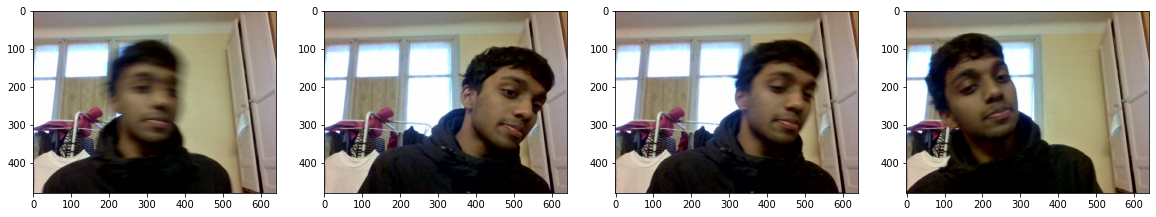

In [64]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for i, image in enumerate(images_plot):
    ax[i].imshow(image)
plt.show()


## Séparation manuelle des données 

Nous devons séparer notre jeu de données en **trois** ensembles :

- Train set : utilisé pour l'entraînement du modèle.
- Validation set : utilisé pour ajuster les hyperparamètres et prévenir le surapprentissage.
- Test set : utilisé pour évaluer la performance finale du modèle sur des données qu'il n'a jamais vues.

Le train set est toujours le plus grand, représentant environ 70 % du jeu de données, tandis que le validation set et le test set représentent chacun environ 15 %.

La séparation en trois ensembles permet de garantir une bonne généralisation du modèle :

- Le train set permet au modèle d’apprendre à reconnaître les motifs dans les données.
- Le validation set aide à ajuster les hyperparamètres (comme le taux d’apprentissage ou la complexité du réseau) et à détecter un éventuel sur-ajustement (overfitting).
- Le test set fournit une évaluation impartiale des performances du modèle sur de nouvelles données.

**Remarque :** Nous avons dû supprimer deux images du jeu de données, car elles étaient de mauvaise qualité. Il reste donc 118 images après ce nettoyage.

In [65]:
# train : 82
# val : 18
# test : 18

In [67]:
82+18+18

118

## Déplacer les labels corresondants

In [68]:
for folder in ['train','test','val']:
    for file in os.listdir(os.path.join('data', folder, 'images')):
        
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        if os.path.exists(existing_filepath): 
            new_filepath = os.path.join('data',folder,'labels',filename)
            os.replace(existing_filepath, new_filepath)   
            
# déplace les labels dans les nouveaux dossiers train test et val

# Augmentation du nombre d'images et de labels en utilisant albumentations

Nous allons à présent augmenter le nombre d'images de notre jeu de données en utilsant **Albumentations**. Nous appliquons des transformations aléatoires (recadrage, flips, ajustements de luminosité, contraste, gamma et décalage des canaux RGB) tout en gérant les bounding box associées aux images annotées.

In [8]:
import albumentations as alb

In [9]:
augmentation = alb.Compose([alb.RandomCrop(width=450, height=450), # compose : séquence de transformations à appliquer sur une image et ses bounding 
                         alb.HorizontalFlip(p=0.5),                # boxes
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                         bbox_params=alb.BboxParams(format='albumentations', 
                                                    label_fields=['class_labels'])) # indique que les images contiennent des bouding boxes et qu'elles 
                                                                                    # doivent être transformées de manièere cohérente avec l'image 

In [10]:
image = cv2.imread(os.path.join('data', 'train', 'images', '35e9d7f1-ed52-11ef-8b24-5c6199029992.jpg'))

# lire une image depuis un chemin spécifique 

In [11]:
with open(os.path.join('data', 'train', 'labels', '35e9d7f1-ed52-11ef-8b24-5c6199029992.json'), 'r') as f:
    label = json.load(f)

In [12]:
# label est un dictionnaire donc fonctionne comme un dictionnaire 

label['shapes']

[{'label': 'face1',
  'points': [[146.3888888888889, 73.33333333333333],
   [334.72222222222223, 282.77777777777777]],
  'group_id': None,
  'description': '',
  'shape_type': 'rectangle',
  'flags': {},
  'mask': None}]

In [13]:
label['shapes'][0]['points'] # pour avoir les coordonnées de la bounding box

[[146.3888888888889, 73.33333333333333],
 [334.72222222222223, 282.77777777777777]]

## Extraction des coordonnées 

In [14]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [15]:
coords

[146.3888888888889, 73.33333333333333, 334.72222222222223, 282.77777777777777]

In [16]:
coords = list(np.divide(coords, [640,480,640,480])) # transforme en np pour le calcul puis les met dans une liste 

In [17]:
type(coords[0])

numpy.float64

## Application de l'augmentation

In [ ]:
augmented = augmentation(image=image, bboxes=[coords], class_labels=['face1']) # bboxes attend une liste de boîte c'ets pour ça qu'on met coords entre
                                                                               # crochets, ça devient une liste qui contient un élément

In [19]:
augmented['bboxes']

[[0.456172858344184,
  0.1518518500857883,
  0.8746913486056858,
  0.6172839694552952]]

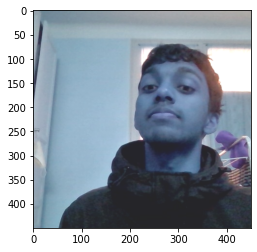

In [20]:
plt.imshow(augmented['image'])

In [21]:
# on a toujours le bounding box mais on le voit mal du coup on va le retracer 

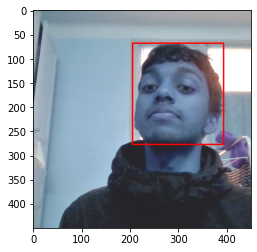

In [22]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)), # prend les coords du côté gauche
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), # prend les coords du côté droit
                    (255,0,0), 2) # couleur : rouge, épaisseur du trait : 2

plt.imshow(augmented['image'])

## Application de l'augmentation sur toutes les images 

In [27]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):  # if car certaines images d'ont pas d'annotations car pas de visage sur la photo 
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            # ESSAYER MIN MAX + SUPPRIMMER LES DOSSIERS EXISTANTS POUR POUVOIR LES REFAIRE
            x_min, x_max = min(coords[0], coords[2]), max(coords[0], coords[2])
            y_min, y_max = min(coords[1], coords[3]), max(coords[1], coords[3])
            coords = [x_min, y_min, x_max, y_max]

            coords = list(np.divide(coords, [640,480,640,480]))

        try: 
            for x in range(60):
                augmented = augmentation(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])

                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 


                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)
            
# on ne trace pas les bounding box comme on l'avait fait pour l'image auparavant mais on récupère les coordonnées du bbox 

Pour chaque image, nous appliquons 60 transformations aléatoires afin d'augmenter artificiellement notre jeu de données. Sachant que nous disposions initialement de 118 images, nous obtenons un total de 118 * 60 = **7 080 images**.

Cette augmentation est essentielle, car un plus grand nombre d'images améliore la capacité du CNN à généraliser et à apprendre des variations naturelles des visages (éclairage, rotation, échelle, ...), ce qui conduit à de meilleures performances lors de l'entraînement.

## Chargement des images augmentées dans des datasets tensorflow

In [7]:
# construction du dataset, ici on fait les entrées 

train_images = tf.data.Dataset.list_files('aug_data\\train\\images\\*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120, 120)))
train_images = train_images.map(lambda x: x/255)

In [8]:
test_images = tf.data.Dataset.list_files('aug_data\\test\\images\\*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120, 120)))
test_images = test_images.map(lambda x: x/255)

In [9]:
val_images = tf.data.Dataset.list_files('aug_data\\val\\images\\*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120, 120)))
val_images = val_images.map(lambda x: x/255)

In [15]:
train_images.as_numpy_iterator().next()

array([[[1.8137256e-02, 0.0000000e+00, 0.0000000e+00],
        [1.1764706e-02, 0.0000000e+00, 0.0000000e+00],
        [7.8431377e-03, 3.9215689e-03, 0.0000000e+00],
        ...,
        [7.8431377e-03, 3.9215689e-03, 0.0000000e+00],
        [7.8431377e-03, 3.9215689e-03, 0.0000000e+00],
        [7.8431377e-03, 3.9215689e-03, 0.0000000e+00]],

       [[1.4705882e-02, 4.9019611e-04, 0.0000000e+00],
        [3.9215689e-03, 0.0000000e+00, 0.0000000e+00],
        [7.8431377e-03, 3.9215689e-03, 0.0000000e+00],
        ...,
        [7.8431377e-03, 3.9215689e-03, 0.0000000e+00],
        [7.8431377e-03, 3.9215689e-03, 0.0000000e+00],
        [7.8431377e-03, 3.9215689e-03, 0.0000000e+00]],

       [[7.3529412e-03, 3.4313726e-03, 0.0000000e+00],
        [3.9215689e-03, 0.0000000e+00, 0.0000000e+00],
        [4.4117649e-03, 4.9019611e-04, 0.0000000e+00],
        ...,
        [7.8431377e-03, 3.9215689e-03, 0.0000000e+00],
        [7.8431377e-03, 3.9215689e-03, 0.0000000e+00],
        [1.2745098e-02

## Préparation des labels 

In [10]:
def load_labels(label_chemin):
    with open(label_chemin.numpy(), 'r', encoding='utf-8') as f:
        label = json.load(f)
    return [label['class']], label['bbox']

# on n'utilise pas la fonction d'avant car on ne pouvait pas la généraliser 
# ici notre label ('y') a deux éléments : la classe et les coordonnées du bbox

## Chargement des labels en dataset tensorflow

In [11]:
train_labels = tf.data.Dataset.list_files('aug_data\\train\\labels\\*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

# on utilise tf.py_function car map attend des focntions tensorflow pure mais dans la fonction load_labels il y a les fonctions json.load et open qui 
# ne sont pas des fonctions pures 

# on doit aussi préciser les entrées : [x]
# et les sorties : [tf.uint8, tf.float16]

In [12]:
test_labels = tf.data.Dataset.list_files('aug_data\\test\\labels\\*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [13]:
val_labels = tf.data.Dataset.list_files('aug_data\\val\\labels\\*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [20]:
test_labels.as_numpy_iterator().next()

(array([1], dtype=uint8),
 array([0.09766, 0.1262 , 0.541  , 0.715  ], dtype=float16))

## Création du dataset final

In [22]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(4920, 4920, 1080, 1080, 1080, 1080)

Nous regroupons les datasets **images** et **labels** pour le train set, val set et test set. 

In [14]:
train = tf.data.Dataset.zip((train_images, train_labels)) # zip = fusionner 
train = train.shuffle(5300) # mélange l'ordre pour ne pas ob=verfitter 
train = train.batch(8) # créer des batchs de 8 pour aller plus vite que 1 par 1 
train = train.prefetch(4) # quand il traite le batch i, il chrage les 4 batchs suivants en attendant pour accélerer l'entraînement 

In [15]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [16]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1300)
val = val.batch(8)
val = val.prefetch(4)

In [29]:
train.as_numpy_iterator().next()[1] # le dataset comporte les images et les labels (attention il y a deux labels)

(array([[1],
        [1],
        [1],
        [1],
        [0],
        [1],
        [1],
        [1]], dtype=uint8),
 array([[6.138e-01, 1.094e-01, 1.000e+00, 7.305e-01],
        [2.971e-01, 1.666e-01, 8.628e-01, 8.999e-01],
        [1.302e-01, 2.427e-01, 6.104e-01, 9.355e-01],
        [6.230e-01, 2.700e-01, 1.000e+00, 8.813e-01],
        [0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00],
        [3.506e-01, 9.880e-04, 8.813e-01, 7.554e-01],
        [1.794e-01, 3.396e-01, 6.040e-01, 9.121e-01],
        [2.391e-01, 6.470e-02, 7.651e-01, 8.164e-01]], dtype=float16))

## Affichage des images

In [26]:
data_echantillon = train.as_numpy_iterator()

In [27]:
resultat = data_echantillon.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


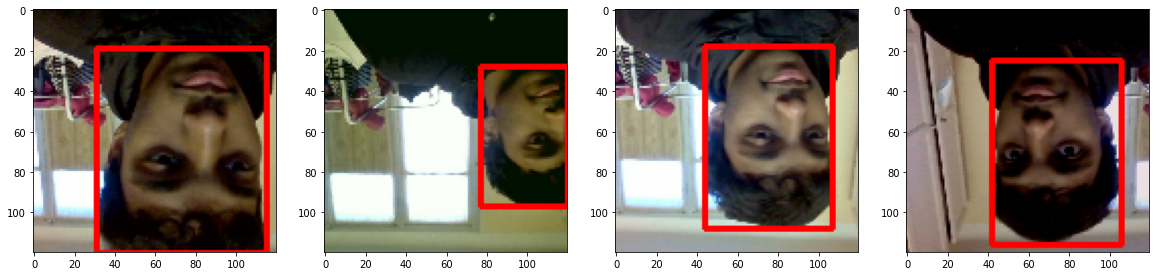

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for i in range(4): 
    echantillon_image = resultat[0][i].copy() # rajoute copy car la fonction cv2.rectangle modifie l'image sauf que notre image était en mode lecture 
    echantillon_coords = resultat[1][1][i]    # seule
    
    cv2.rectangle(echantillon_image, 
                  tuple(np.multiply(echantillon_coords[:2], [120,120]).astype(int)),
                  tuple(np.multiply(echantillon_coords[2:], [120,120]).astype(int)), 
                        (255,0,0), 2)

    ax[i].imshow(echantillon_image)

# Création du modèle (enfin!)

Nous construisons un modèle de réseau de neurones convolutifs (CNN) en nous basant sur l'architecture VGG16, que nous avons adaptée à notre cas spécifique de reconnaissance faciale. Pour cela, nous avons retiré la partie fully connected afin de permettre la prédiction de deux éléments : la classe du visage et les coordonnées de la bounding box.

Ainsi, nous pouvons considérer qu’il y a "**deux modèles**" à construire au sein du même réseau : l’un chargé de la classification et l’autre de la régression des coordonnées de la bounding box.

In [1]:
import numpy as np

In [7]:
import tensorflow as tf

In [8]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

In [17]:
vgg = VGG16(include_top=False) # include_top = false veut dire qu'on ne prend pas en compte la partie fully connected 

In [18]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

## Création du modèle

In [19]:
def creation_modele(): 
    couche_entree = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(couche_entree)

    # vu qu'on a pas pris la partie FC, il n'y a pas de flatten, au lieu d'effectuer un flatten on effectue un GlobalMaxPooling2D() (on aurait 
    # également pu faire GlobalAveragePooling2D())
    # c'est quoi un GlobalMaxPooling2D() ? : réduit un tenseur 2D (hauteur x largeur x canaux) en un vecteur plat (1D) en prenant le maximum de chaque 
    # canal

    # la sortie du VGG est de taille 7*7*512, après le GlobalMaxPooling2D(), on abtient un vecteur de taille 1*1*512

    # Classification Modèle  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1) # rajoute une couche FC
    class2 = Dense(1, activation='sigmoid')(class1) # la sortie : 0 = pas de visage, 1 = visage
    
    # Bounding box Modèle
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=couche_entree, outputs=[class2, regress2])
    return facetracker

## Test du réseau de neurones

In [20]:
facetracker = creation_modele()

In [21]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 120, 120, 3  0           []                               
                                )]                                                                
                                                                                                  
 vgg16 (Functional)             (None, None, None,   14714688    ['input_2[0][0]']                
                                512)                                                              
                                                                                                  
 global_max_pooling2d (GlobalMa  (None, 512)         0           ['vgg16[0][0]']                  
 xPooling2D)                                                                                  

Le modèle contient 16 826 181 paramètres. 

In [22]:
X, y = train.as_numpy_iterator().next() # rappel le train set est composé de 2 datasets, les photos et la varibable à expliquer (qui contient elle 
                                        # elle même 2 labels)

In [23]:
X.shape

(8, 120, 120, 3)

In [24]:
classes, coords = facetracker.predict(X) # on peut utiliser predict car dans la création de la fonction on a utilisé la fonction Model

1/1 [==============================] - 1s 1s/step


In [25]:
classes, coords

(array([[0.3995249 ],
        [0.5026903 ],
        [0.5542661 ],
        [0.4512348 ],
        [0.46538448],
        [0.4866361 ],
        [0.41057035],
        [0.6046935 ]], dtype=float32),
 array([[0.6240505 , 0.5421231 , 0.6399374 , 0.3134266 ],
        [0.6067618 , 0.5653925 , 0.49154234, 0.38775945],
        [0.68833447, 0.5398092 , 0.5005443 , 0.35010564],
        [0.63592863, 0.5211024 , 0.43946055, 0.42109966],
        [0.72509927, 0.55432826, 0.39442852, 0.46503448],
        [0.6935954 , 0.5876006 , 0.45499143, 0.44417834],
        [0.6616453 , 0.53546023, 0.44801062, 0.34055644],
        [0.6138313 , 0.53140736, 0.5321921 , 0.35844618]], dtype=float32))

In [26]:
# des résultats pas fou c'est normal le modèle n'est pas entraîné 

## Définition des fonctions coûts et optimiseurs

In [27]:
len(train)

615

In [28]:
615*8

4920

In [29]:
batches_par_epoch = len(train)
lr_decroissant = (1./0.75 -1)/batches_par_epoch # à chaque batch le lr diminue 

In [30]:
opt = tf.keras.optimizers.Adam(learning_rate=0.0001, decay=lr_decroissant) # utilisation de l'optimiseur Adam

### Création de la fonction coût classification et fonction coût localisation

In [31]:
# rappel : notre variable y contien 2 éléments, la bbox et les coordonnées de la bbox 
# On suppose que les boîtes englobantes sont représentées sous la forme : [xmin, ymin, xmax, ymax] où (xmin, ymin) est le coin supérieur gauche et 
# (xmax, ymax) le coin inférieur droit 

def localisation_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2])) 
    # y_true et y_hat contiennent 2 éléments : ":" signifie qu'on prend tous les bbox (première dim de y), ":2" signifie qu'on ne prend que les 2 
    # premières coords

    # delta_coord calcule les erreurs des coords 
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred)) 

    # delta_size calcule les erreurs de la largeur et longueur de la bbox 
    
    return delta_coord + delta_size

In [32]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localisation_loss

Comme nous l'avons dit précédemment, il y a "deux modèles" à construire. Pour le modèle de classification (visage ou non), la fonction coût utilisée est un Binary Cross Entropy classique. 

En revanche, pour le modèle de régression, nous avons dû créer notre propre fonction coût. Elle s'inspire de la MSE. Elle prend en compte les erreurs des coordonnées de la bouding box : x_min, y_min, x_max et y_max, mais aussi les erreurs de largeur et longueur de la bouding box. 

**Pourquoi séparer les erreurs de coordonnées et les erreurs de dimensions pour le modèle de régression ?**

Même s'ils sont liés, ces deux erreurs n'ont pas exactement le même impact sur la localisation de l'objet. Une bounding box peut avoir un bon coin supérieur gauche mais de mauvaises dimensions, ou inversement.

Les séparer permet de pondérer différemment ces erreurs et d'assurer que le modèle apprend correctement à prédire à la fois l'emplacement et la taille des bounding boxes. Cela évite qu’une erreur dans la position des coins masque une erreur dans la taille, ou inversement.

## Tests de nos fonctions

In [33]:
localisation_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=12.795869>

In [34]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.73368853>

In [35]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=12.795869>

## Entraînement du réseau de neurones

In [36]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): # **kwargs est utilisé pour gérer des paramètres optionnels sans les définir explicitement, par exmeple
                                               # si eyetracker avait des arguments comme name,... sans kwargs ont aurait eu une erreur 
                                               # remarque : kwargs transforme tous les arguments en dictionnaire.

        super().__init__(**kwargs) # ici on envoie ces arguments (optionnels) la classe parent (Model)
        self.model = eyetracker

    # la méthode compile() est utilisée pour configurer le modèle avant l'entraînement. Elle est similaire à model.compile() en Keras, mais ici, 
    # on l'adapte aux besoins du modèle personnalisé FaceTracker.

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs) # appelle la méthode compile() de Model, elle permet d'inclure des arguments supplémentaires comme 
                                  # metrics=['accuracy'],...
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch # comme le dataset train
        
        with tf.GradientTape() as tape: # pour enregistrer les calculs de gradients, pour calculer les gradients on va utiliser tf.gradient
            classes, coords = self.model(X, training=True) # trianing=True : le modèle se comporte différemment selon s'il s'agit de l'entraînement ou
                                                           # du test, la principale différence est au niveau des couches Dropout ou BatchNormalization 
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables) # calcul des gradients entre la perte totale et les paramètres du modèle
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables)) # mise à jour des paramètres (poids+biais)
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [37]:
model = FaceTracker(facetracker) # l'argument "eyetracker" est obligatoire comparé à opt, batch,...
                                 # si on avait pas encore initialisé opt c'est pas grave, il suffit juste d'appeler ensuite la fonction compile et 
                                 # de préciser opt (c'est ce qu'on a fait dans la ligne d'après)

In [38]:
model.compile(opt, classloss, regressloss)

## Entraînement

In [39]:
logdir='logs'

In [40]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

- Les logs sont principalement utilisés pour visualiser les performances du modèle dans TensorBoard.
- Les callbacks sont utilisés pour automatiser des actions pendant l'entraînement (comme sauvegarder les meilleurs modèles, arrêter l'entraînement tôt, ...).

TensorBoard est un outil de visualisation de TensorFlow qui permet de suivre et de visualiser le processus d'entraînement d'un modèle. Il fournit des graphiques interactifs et des tableaux de bord pour explorer et analyser les performances de ton modèle, ainsi que pour diagnostiquer d'éventuels problèmes pendant l'entraînement. 

In [ ]:
hist = model.fit(train, epochs=10, validation_data=val, callbacks=[tensorboard_callback]) 

# epochs = 10 signifie qu'on entraînons le modèle 10 fois
# fit fait partie de la classe de base tf.keras.Model

Nous entraînons le modèle avec le train set, mais aussi avec le validation set pour voir si le modèle généralise bien.

## Graphique des performances 

In [42]:
hist.history

{'total_loss': [0.010347116738557816,
  0.00528354337438941,
  0.003862490877509117,
  0.010844836011528969,
  0.007189995143562555,
  0.005358632188290358,
  0.0027446532621979713,
  0.0013943351805210114,
  0.0032197139225900173,
  0.0036071036010980606],
 'class_loss': [0.0001522103266324848,
  8.360440551768988e-05,
  1.534823127258278e-06,
  1.5273740245902445e-06,
  9.685756907629184e-08,
  4.1798039092100225e-06,
  2.317140115337679e-06,
  1.4305138620329672e-06,
  2.2351754580540728e-07,
  9.872395821730606e-06],
 'regress_loss': [0.010271011851727962,
  0.005241740960627794,
  0.003861723467707634,
  0.010844072327017784,
  0.007189946714788675,
  0.0053565423004329205,
  0.0027434946969151497,
  0.0013936199247837067,
  0.0032196021638810635,
  0.003602167358621955],
 'val_total_loss': [0.370901495218277,
  0.30444949865341187,
  0.3991800844669342,
  0.0424291230738163,
  0.10265075415372849,
  0.051383886486291885,
  0.005785973742604256,
  0.1100810170173645,
  0.003847434

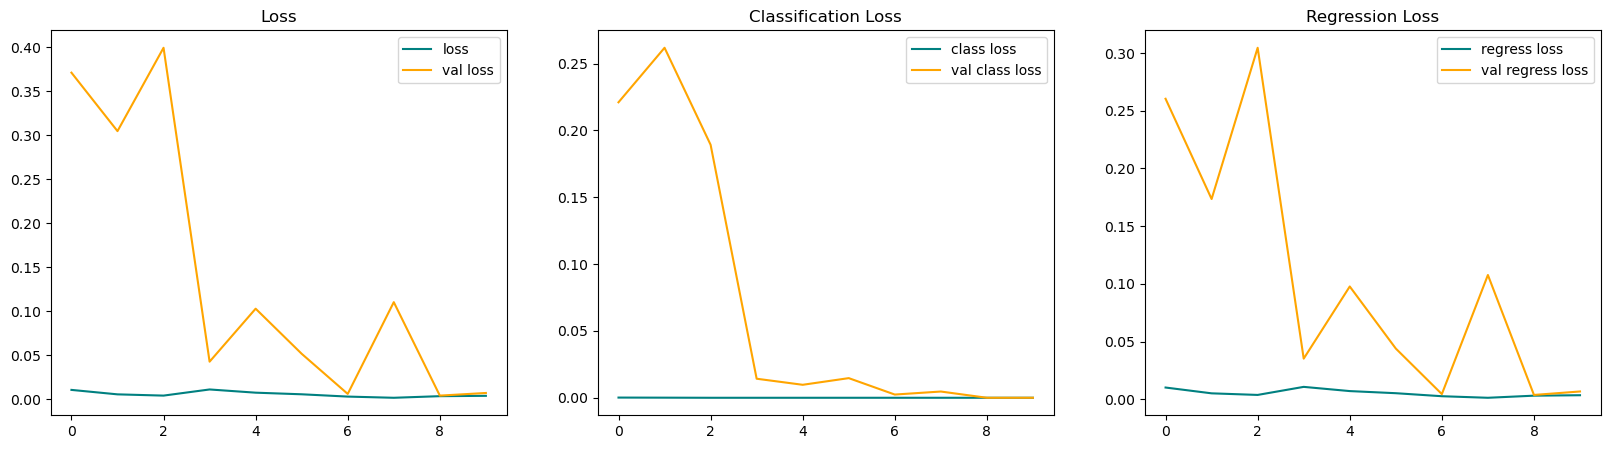

In [43]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5)) # on aurait pu écrire plt.subplots(1,3)
                                                # le ax "joue le rôle du" plt

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

**Classification loss**

- La courbe bleue (train loss) est relativement stable et basse, ce qui indique que le modèle apprend bien sur l'ensemble d'entraînement.
- La validation loss (orange) démarre haute, diminue rapidement et devient presque nulle après quelques itérations. Cela peut indiquer que le modèle devient performant pour la classification, mais il pourrait aussi y avoir un sur-ajustement (overfitting) si la validation loss atteint zéro trop rapidement.

**Regréssion loss**

- La courbe bleue (train loss) est relativement stable et basse, ce qui indique que le modèle apprend bien sur l'ensemble d'entraînement.
- La courbe orange (val loss) commence élevée avec de fortes fluctuations avant de diminuer progressivement. Cela peut suggérer une variance élevée au début, mais elle semble se stabiliser.

**Total loss**

On sait que total loss = regress loss + 0.5*class loss. Ainsi, tout comme la régression loss : 

- La courbe d'entraînement (bleue) reste relativement stable et basse.
- La validation loss (orange) a un comportement similaire à la regress loss : variations au début, puis stabilisation à un niveau faible.


**Conclusion**

Le modèle semble bien apprendre sur l'entraînement, car les pertes lors de l'entraînement restent faibles.
Les pertes lors de la validation sont plus instables au début mais finissent par converger.

## Prédictions 

Nous allons maintenant évaluer les performance du modèle avec le test set pour verifier si le modèle est fiable et précis. 

In [5]:
import cv2

In [72]:
test_data = test.as_numpy_iterator()

In [82]:
test_sample = test_data.next()

In [83]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 427ms/step


In [84]:
# !pip install opencv-python 

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [0.0..255.0].


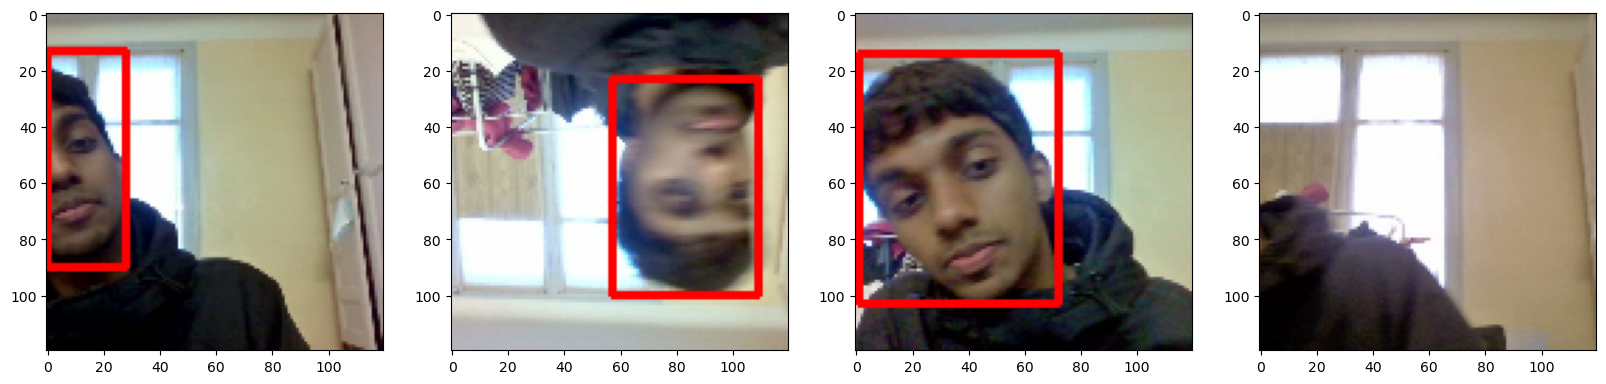

In [85]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for i in range(4): 
    sample_image = test_sample[0][i].copy()
    sample_coords = yhat[1][i]
    
    if yhat[0][i] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[i].imshow(sample_image)

Les résultats montrent que le modèle fonctionne correctement : en l'absence de visage dans l’image, aucune bounding box n’est générée, ce qui indique une bonne capacité de filtrage des images non pertinentes. Lorsqu’un visage est présent, le modèle parvient à le détecter avec précision et à le localiser correctement à l’aide d’une bounding box bien ajustée. Ces observations confirment la fiabilité et la précision du modèle.

## Sauvegarde du modèle 

In [2]:
from tensorflow.keras.models import load_model

In [87]:
facetracker.save('facetracker.h5') # sauvegarde le modèle facetracker dans un fichier facetracker.h5, cela permet de réutiliser le modèle plus tard 
                                   # sans devoir le réentraîner.

In [3]:
facetracker = load_model('facetracker.h5')

In [98]:
# quand je vais le réutiliser, à chaque fois je dois entraîner le modèle et faire des prédictions

In [101]:
print(os.getcwd())

C:\Users\Nesho


## Détection en temps réel 

Si vous voulez essayer ce modèle de reconnaissance faciale, vous devez suivre ces étapes : 
- télécharger le modèle "facetracker.h5"
- exécuter le code ci dessous dans votre IDE

**Remarque :** Si vous ne possédez pas les bibliothèques requises comme tensorflow ou opencv vous devez les télécharger. Il est possible de le faire avec la commande : **pip install tensorflow** et/ou **pip install opencv-python** (respectivement **!pip install tensorflow** et **!pip install opencv-python** si vous êtes sur JupyterLab)

In [1]:
import tensorflow as tf 

In [2]:
import numpy as np 
import matplotlib.pyplot as plt
import cv2

In [3]:
from tensorflow.keras.models import load_model

In [4]:
facetracker = load_model('facetracker.h5')

In [9]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Contrôle le rectangle principal
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Contrôle le bbox du rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Contrôle le texte
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 87ms/step


KeyboardInterrupt: 

In [10]:
cap.release()
cv2.destroyAllWindows()

# Conclusion 

Les performances obtenues avec le modèle sont globalement bonnes, avec des résultats convaincants sur l'ensemble d'entraînement, de validation et de test. Toutefois, certaines limitations apparaissent, notamment des bugs lorsque l’utilisateur s’éloigne de la caméra. Cela pourrait être dû à un manque de données représentatives pour ces cas spécifiques ou à des contraintes liées à la robustesse du modèle en conditions réelles.

Une amélioration des performances aurait pu être faite en poursuivant l'entraînement sur un plus grand nombre d'itérations. Cependant, cela impliquerait un coût en calcul plus élevé et une augmentation significative du temps nécessaire à l'entraînement. Un compromis entre précision et efficacité a donc été trouvé dans ce projet.

Des optimisations futures, comme l'utilisation de techniques d'augmentation de données ou un ajustement des hyperparamètres, pourraient permettre de corriger les instabilités observées tout en limitant le surcoût en calcul.